# Download DataSet MNIST

In [38]:
import keras
from keras import layers
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# download dataset (train & test images)
(x_train, _), (x_test, _) = mnist.load_data()

# dataset normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Display DataSet Images

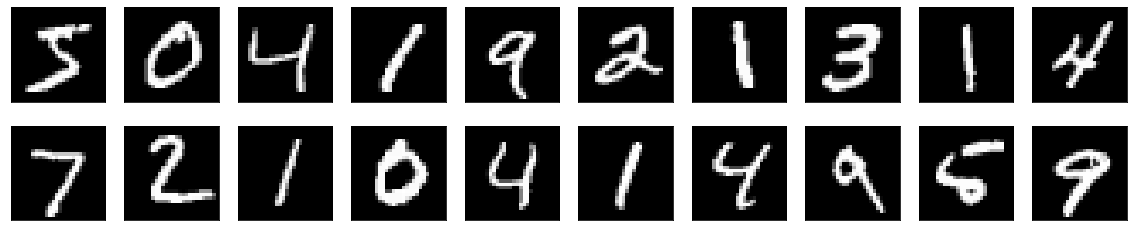

In [39]:
def display_2row_images(dataset_1, dataset_2, number=10):
  n = 10  # number of images to display

  plt.figure(figsize=(20, 4))
  for i in range(number):
    # display dataset_1 images
    ax = plt.subplot(2, number, i+1)
    plt.imshow(dataset_1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display test images
    ax = plt.subplot(2, number, i+1+number)
    plt.imshow(dataset_2[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
def display_images(dataset_1, number=10):
  n = 10  # number of images to display

  plt.figure(figsize=(20, 4))
  for i in range(number):
    # display dataset_1 images
    ax = plt.subplot(1, number, i+1)
    plt.imshow(dataset_1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display dataset for training & testing 
display_2row_images(x_train, x_test, 10)

# Autoencoder models


In [47]:
# create autoencoder model
def encoder(input):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    return conv3
  
def decoder(input):
    #decoder
    conv4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input) #7 x 7 x 128
    up1 = layers.UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = layers.UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded


def autoencoder(input_img):
  # encoder 
  encoder_layer = encoder(input_img)

  # decoder 
  decoder_layer = decoder(encoder_layer)

  # create autoencoder model
  autoencoder_model = keras.Model(input_img, decoder_layer)

  # create encoder model
  encoder_model = keras.Model(input_img, encoder_layer)

  return autoencoder_model, encoder_model

# Train model

In [ ]:
# compile model 
epoch = 50
batch_size = 128
input_img = layers.Input(shape=(28, 28, 1))
autoencoder, encoder = autoencoder(input_img)
autoencoder.compile(loss='binary_crossentropy', optimizer ='adam')
autoencoder.summary()

In [ ]:
# train model 
x_valid = x_train[50000:]
x_train = x_train[:50000]
autoencoder_train = autoencoder.fit(x_train, x_train,
                                    epochs = epoch, 
                                    shuffle = True,
                                    batch_size = batch_size,
                                    validation_data=(x_valid, x_valid))

# Statistics of training 'loss'

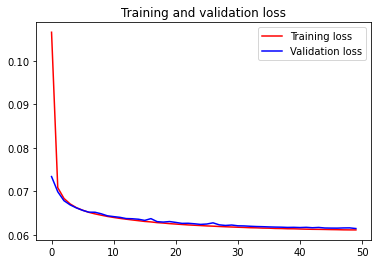

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epoch)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test model 

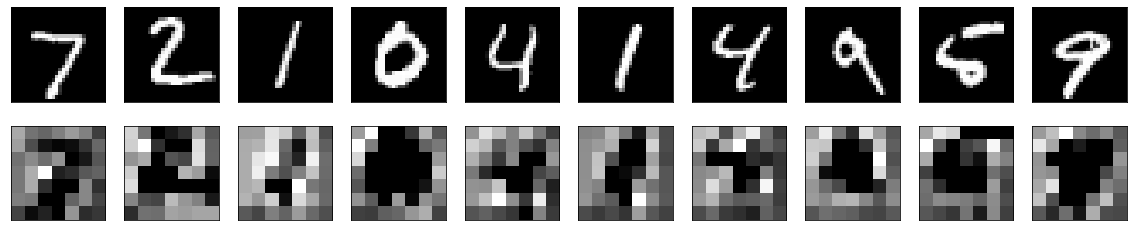

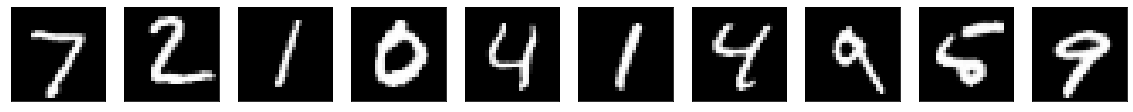

In [ ]:
# model prediction for testing images
x_encoder = encoder(x_test)
x_decoder = autoencoder.predict(x_test)
display_2row_images(x_test, x_encoder[..., 0], 10)
display_images(x_decoder[..., 0], 10)

# Denoising 

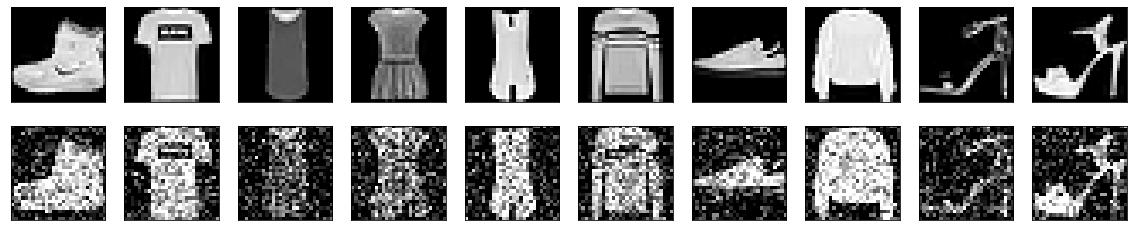

In [42]:
# applicate noise to fashion mnist dataset images
# download dataset (train & test images)
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# dataset normalization
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# gaussian noise with intensity of 20%
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# display noised images
display_2row_images(x_train, x_train_noisy, 10)

In [ ]:
# train autoencoder model 
x_valid = x_train[50000:]
x_train = x_train[:50000]

x_valid_noisy = x_train_noisy[50000:]
x_train_noisy = x_train_noisy[:50000]
epoch = 50
batch_size = 128
denoiser_train = autoencoder.fit(x_train_noisy, x_train,
                                 epochs = epoch, 
                                 shuffle = True,
                                 batch_size = batch_size,
                                 validation_data=(x_valid_noisy, x_valid))

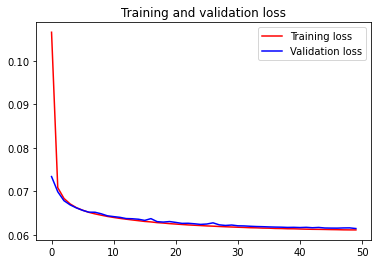

In [50]:
# denoiser model statistics
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epoch)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

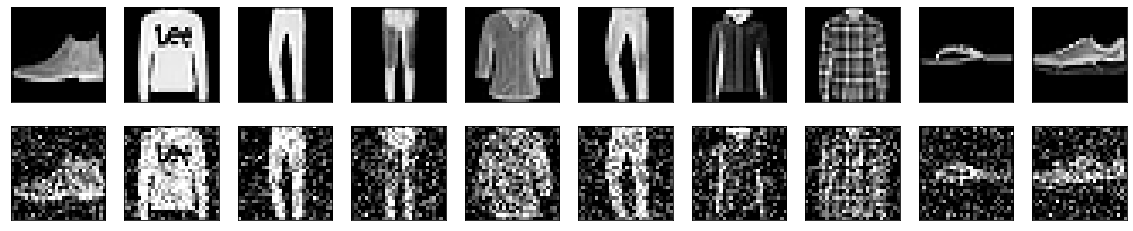

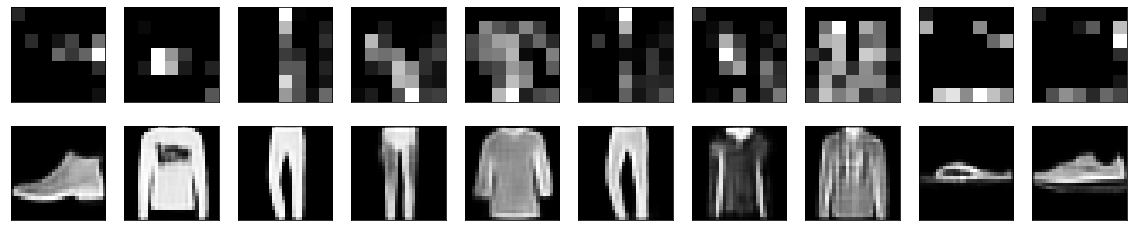

In [52]:
# test model 
# model prediction for testing images
x_encoder_noisy = encoder(x_test_noisy)
x_decoder_noisy = autoencoder.predict(x_test_noisy)
display_2row_images(x_test, x_test_noisy, 10)
display_2row_images(x_encoder_noisy[..., 0], x_decoder_noisy[..., 0], 10)